In [ ]:
from google.colab import files

uploaded = files.upload()


Saving student.zip to student.zip


In [ ]:
import zipfile

# Unzipping the uploaded file
with zipfile.ZipFile("student.zip", 'r') as zip_ref:
    zip_ref.extractall(".")


import os
print("Extracted files:", os.listdir("."))


Extracted files: ['.config', 'student.zip', 'student.txt', 'student-merge.R', 'student-mat.csv', 'student-por.csv', 'sample_data']


In [ ]:
import pandas as pd

df = pd.read_csv("student-mat.csv", sep=';')
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


🎯 Random Forest Results:
Mean Squared Error: 3.80
R2 Score: 0.81

📊 Linear Regression Results:
R2 Score: 0.72


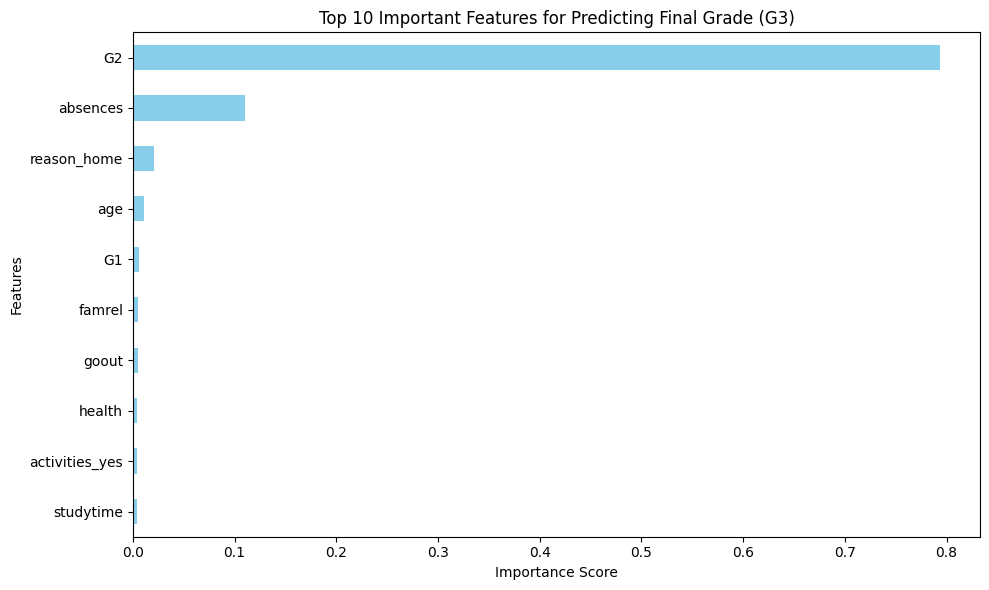

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Loading the dataset 

# Step 2: Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Defining features and target
X = df_encoded.drop('G3', axis=1)  # All features except final grade
y = df_encoded['G3']               # Target: Final grade

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Training Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluating Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🎯 Random Forest Results:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")

# Step 7: Training Linear Regression for comparison
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
print("\n📊 Linear Regression Results:")
print(f"R2 Score: {r2_lr:.2f}")

# Step 8: Plotting Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features for Predicting Final Grade (G3)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
